 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



Optimal Distanc for two sequences is :  20.0


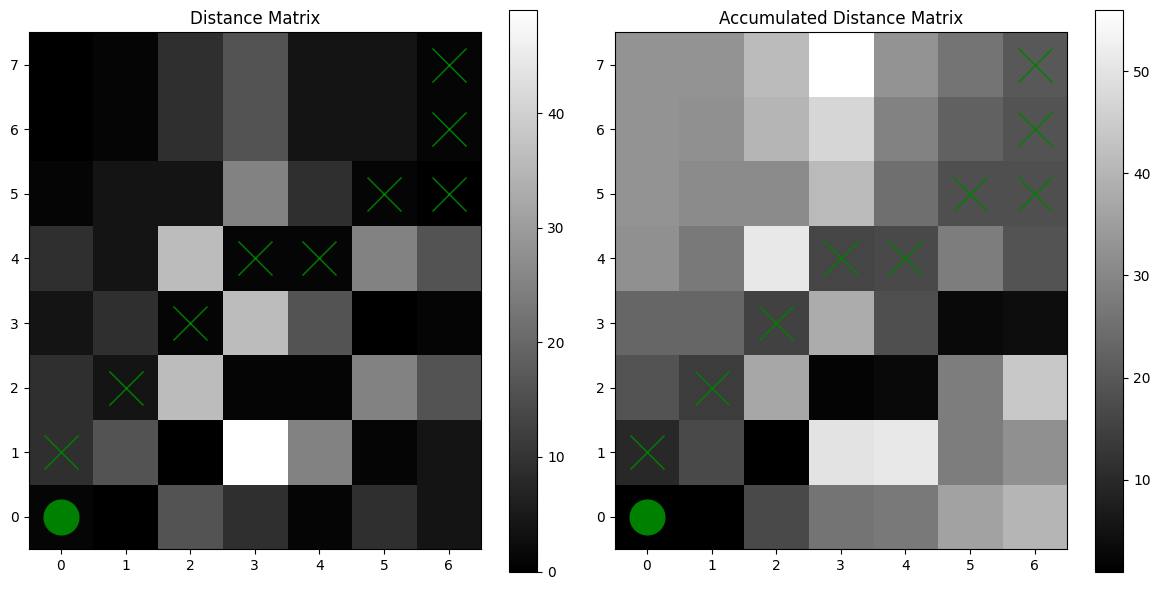

In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    rows = len(sequence1)
    cols = len(sequence2)
    # Step 1: Compute Distance Matrix
    distance_matrix = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            distance_matrix[i, j] = np.sum((sequence1[i] - sequence2[j]) ** 2)  #Compute the distance between the two points
    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    DTW_cumulate_Matrix = np.zeros((rows,cols))
    DTW_cumulate_Matrix[0, 0] = distance_matrix[0, 0]
    for i in range(1,rows):
        DTW_cumulate_Matrix[i, 0] = distance_matrix[i, 0] + DTW_cumulate_Matrix[i-1, 0]
    for j in range(1,cols):
        DTW_cumulate_Matrix[0, j] = distance_matrix[0, j] + DTW_cumulate_Matrix[0, j-1]
    for i in range(1, rows):
        for j in range(1, cols):
            DTW_cumulate_Matrix[i, j] = distance_matrix[i, j] + min(DTW_cumulate_Matrix[i-1, j-1],
                                                                  DTW_cumulate_Matrix[i, j-1],
                                                                  DTW_cumulate_Matrix[i-1, j])
    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    optimal_dtw_path = [(rows-1, cols-1)]
    opt_distance = 0.0
    i = len(sequence1) - 1  # length of the sequence1
    j = len(sequence2) - 1  # length of the sequence2
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        # Add the current indexes distance
        #Compute the distance between the points sequence1[i] and sequence2[j]
        #Store the required indexes to obtain the optimal path
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            if DTW_cumulate_Matrix[i-1, j] == min(DTW_cumulate_Matrix[i-1, j-1], DTW_cumulate_Matrix[i, j-1], DTW_cumulate_Matrix[i-1, j]):
                i -= 1
            elif DTW_cumulate_Matrix[i, j-1] == min(DTW_cumulate_Matrix[i-1, j-1], DTW_cumulate_Matrix[i, j-1], DTW_cumulate_Matrix[i-1, j]):
                j -= 1
            else:
                i -= 1
                j -= 1
        optimal_dtw_path.append((i, j))
    opt_distance=DTW_cumulate_Matrix[-1, -1]
    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return opt_distance, optimal_dtw_path[::-1], distance_matrix, DTW_cumulate_Matrix 

def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    #Compute distance and cumulative distance between the given templates
    #Obtain the optimal path using "DTW" function
    opt_distance, optimal_dtw_path, distance_matrix, DTW_cumulate_Matrix =DTW(sequence2,sequence1)
    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    print("Optimal Distanc for two sequences is : ",opt_distance)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(distance_matrix, origin='lower', cmap='gray', interpolation='nearest')
    plt.title('Distance Matrix')
    plt.colorbar()
    plt.plot(0,0, 'go', markersize=25)
    for i, j in optimal_dtw_path:
        plt.plot(j, i, 'gx', markersize=25)
    plt.subplot(1, 2, 2)
    plt.imshow(DTW_cumulate_Matrix, origin='lower', cmap='gray', interpolation='nearest')
    plt.title('Accumulated Distance Matrix')
    plt.colorbar()
    plt.plot(0,0, 'go', markersize=25)
    for i, j in optimal_dtw_path:
        plt.plot(j, i, 'gx', markersize=25)
    plt.tight_layout()
    plt.show()
A = [4, 3, 7, 0, 2, 6, 5]
B = [3, 7, 1, 6, 1, 5, 4, 4]
plotDTWpath(A,B)


<b> Report your observations </b>

1. The optimal path is choosing by trail and error method in which it sees all possibilities to get the optimal distance.

2. Optimal path will goes from left to right and bottom to top and doesn't go backwards.

3. If the point is at i then at diogonal way distance and left then top direction distances have same then i chooses diogonal as the path will be shortened by 1 step eventhough the distances are same in both directions.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
from pydub import AudioSegment

# RECORD = 
# const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
# const b2text = blob => new Promise(resolve => {
#   const reader = new FileReader()
#   reader.onloadend = e => resolve(e.srcElement.result)
#   reader.readAsDataURL(blob)
# })
# var record = time => new Promise(async resolve => {
#   stream = await navigator.mediaDevices.getUserMedia({ audio: true })
#   recorder = new MediaRecorder(stream)
#   chunks = []
#   recorder.ondataavailable = e => chunks.push(e.data)
#   recorder.start()
#   await sleep(time)
#   recorder.onstop = async ()=>{
#     blob = new Blob(chunks)
#     text = await b2text(blob)
#     resolve(text)
#   }
#   recorder.stop()
# })


def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.

wn = Audio(r"C:\Users\sai kiran kocherla\Downloads\recording.wav", autoplay=True)
display(wn)

**Algorithm to perform isolated digit recognition**

In [254]:
import scipy.io.wavfile as wav
# !pip -q install python_speech_features
# !pip -q install speechpy
from python_speech_features import mfcc
import speechpy
import numpy as np
def mfcc_features(wavfile):
    (rate,sig) = wav.read(wavfile)
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    return mfcc_feat_cmvn

In [261]:
def load_data(folder_path):
    digit_recordings = {}
    for digit in range(10):
        digit_folder = folder_path + "\\" + str(digit) 
        recordings = []
        for i in range(1,6):
            filepath = digit_folder + "\\ai24mtech02003_rec" + str(digit) + "_" + str(i) + ".wav"
            with open(filepath, "rb") as file:
                recording = mfcc_features(file)
                recordings.append(recording)
        digit_recordings[digit] = recordings
    return digit_recordings
folder_path = r"C:\Users\sai kiran kocherla\Downloads\digit_recordings"
recordings = load_data(folder_path)
print(recordings.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [262]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def vectorDTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    rows = len(sequence1)
    cols = len(sequence2)
    # Step 1: Compute Distance Matrix
    distance_matrix = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            distance_matrix[i, j] = np.sqrt(np.sum((sequence1[i] - sequence2[j]) ** 2))  #Compute the distance between the two points
    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    DTW_cumulate_Matrix = np.zeros((rows,cols))
    DTW_cumulate_Matrix[0, 0] = distance_matrix[0, 0]
    for i in range(1,rows):
        DTW_cumulate_Matrix[i, 0] = distance_matrix[i, 0] + DTW_cumulate_Matrix[i-1, 0]
    for j in range(1,cols):
        DTW_cumulate_Matrix[0, j] = distance_matrix[0, j] + DTW_cumulate_Matrix[0, j-1]
    for i in range(1, rows):
        for j in range(1, cols):
            DTW_cumulate_Matrix[i, j] = distance_matrix[i, j] + min(DTW_cumulate_Matrix[i-1, j-1],
                                                                  DTW_cumulate_Matrix[i, j-1],
                                                                  DTW_cumulate_Matrix[i-1, j])
    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    optimal_dtw_path = [(rows-1, cols-1)]
    opt_distance = 0.0
    i = len(sequence1) - 1  # length of the sequence1
    j = len(sequence2) - 1  # length of the sequence2
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        # Add the current indexes distance
        #Compute the distance between the points sequence1[i] and sequence2[j]
        #Store the required indexes to obtain the optimal path
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            if DTW_cumulate_Matrix[i-1, j] == min(DTW_cumulate_Matrix[i-1, j-1], DTW_cumulate_Matrix[i, j-1], DTW_cumulate_Matrix[i-1, j]):
                i -= 1
            elif DTW_cumulate_Matrix[i, j-1] == min(DTW_cumulate_Matrix[i-1, j-1], DTW_cumulate_Matrix[i, j-1], DTW_cumulate_Matrix[i-1, j]):
                j -= 1
            else:
                i -= 1
                j -= 1
        optimal_dtw_path.append((i, j))
    opt_distance=DTW_cumulate_Matrix[-1, -1]
    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return opt_distance, optimal_dtw_path[::-1], distance_matrix, DTW_cumulate_Matrix 

def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    #Compute distance and cumulative distance between the given templates
    #Obtain the optimal path using "DTW" function
    opt_distance, optimal_dtw_path, distance_matrix, DTW_cumulate_Matrix =vectorDTW(sequence2,sequence1)
    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    print("Optimal Distanc for two sequences is : ",opt_distance)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(distance_matrix, origin='lower', cmap='gray', interpolation='nearest')
    plt.title('Distance Matrix')
    plt.colorbar()
    plt.plot(0,0, 'go', markersize=25)
    for i, j in optimal_dtw_path:
        plt.plot(j, i, 'gx', markersize=25)
    plt.subplot(1, 2, 2)
    plt.imshow(DTW_cumulate_Matrix, origin='lower', cmap='gray', interpolation='nearest')
    plt.title('Accumulated Distance Matrix')
    plt.colorbar()
    plt.plot(0,0, 'go', markersize=25)
    for i, j in optimal_dtw_path:
        plt.plot(j, i, 'gx', markersize=25)
    plt.tight_layout()
    plt.show()


**Plot the optimal DTW path**

(287, 13) (293, 13)
(293, 13) (293, 13)
Optimal Distanc for two sequences is :  16612.11007499695


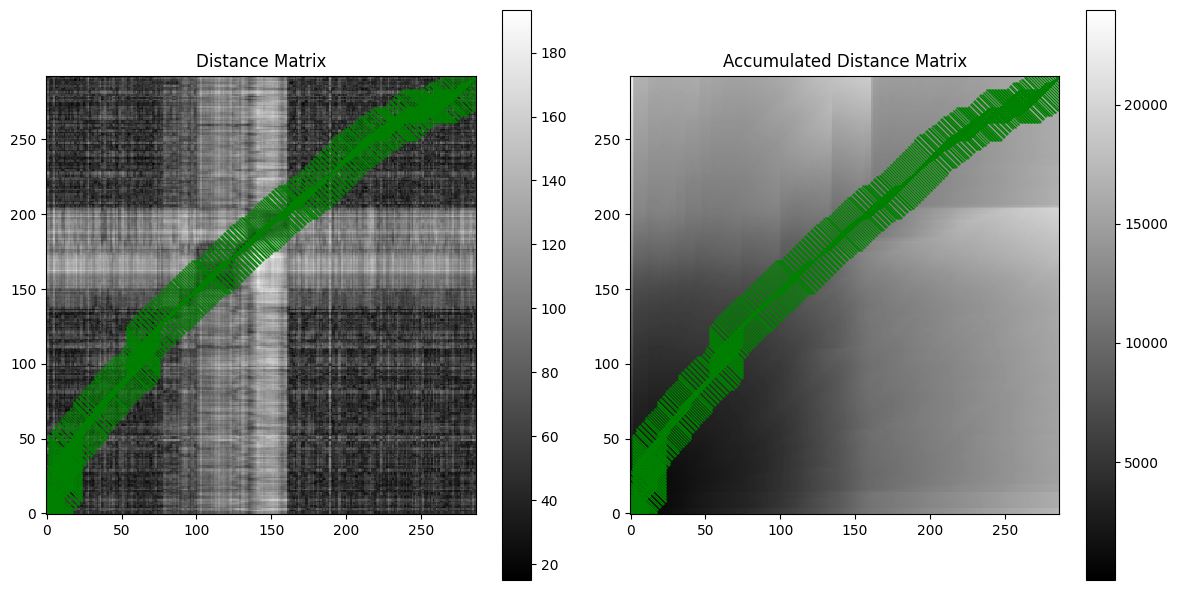

Optimal Distanc for two sequences is :  19562.114267349243


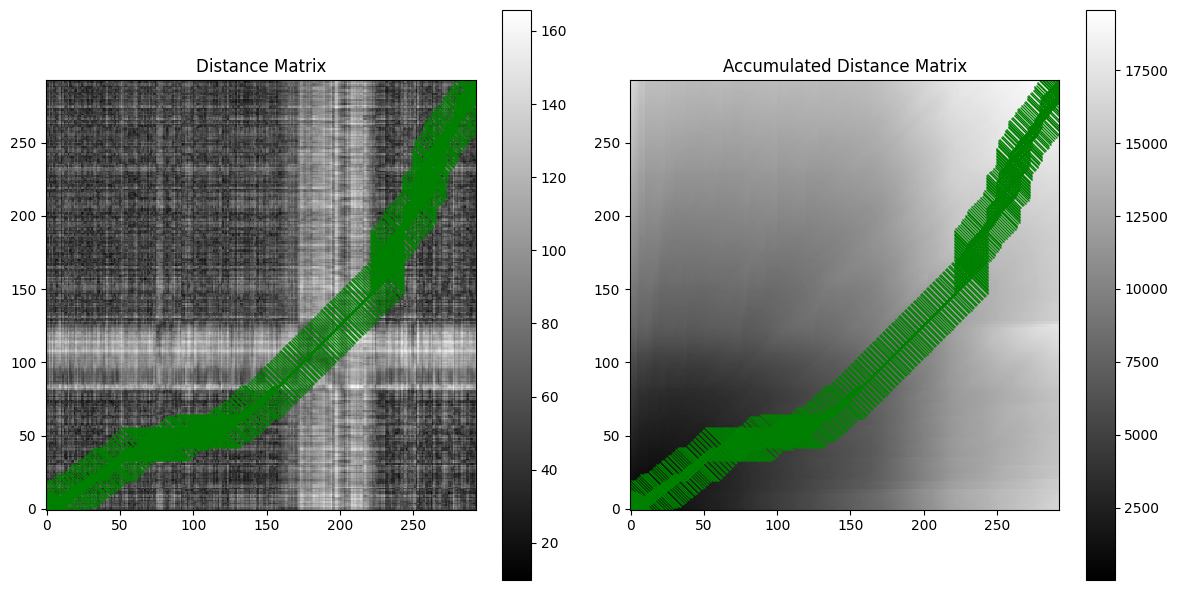

In [263]:
ref_signal1, test_signal1 = recordings[0][2], recordings[0][0]
ref_signal2, test_signal2 = recordings[0][3], recordings[9][4]
print(ref_signal1.shape,test_signal1.shape)
print(ref_signal2.shape,test_signal2.shape)
plotDTWpath(ref_signal1,test_signal1)
plotDTWpath(ref_signal2,test_signal2)

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [264]:
import numpy as np
import collections
correct_predictions = 0
total_predictions = 0
confusion_matrix = collections.defaultdict(lambda: collections.defaultdict(int))
data = []

for digit, recordings_for_digit in recordings.items():
    for test_signal in recordings_for_digit:
        min_distance = float('inf')
        recognized_digit = None
        test_signal = np.array(test_signal)
        for digit2, ref_recordings_for_digit in recordings.items():
            for ref_recording in ref_recordings_for_digit:
                if np.array_equal(ref_recording, test_signal):
                    continue
                else:
                    ref_recording = np.array(ref_recording)
                    distance, _, _, _ = vectorDTW(ref_recording, test_signal)
                    if distance < min_distance:
                        min_distance = distance
                        recognized_digit = digit2
        confusion_matrix[digit][recognized_digit] += 1
        if digit == recognized_digit:
            correct_predictions += 1
        
        total_predictions += 1
accuracy = (correct_predictions / total_predictions) * 100
print("Accuracy:", accuracy)
print("Confusion Matrix:")
for digit, row in confusion_matrix.items():
    print(digit, row)


Accuracy: 100.0
Confusion Matrix:
0 defaultdict(<class 'int'>, {0: 5})
1 defaultdict(<class 'int'>, {1: 5})
2 defaultdict(<class 'int'>, {2: 5})
3 defaultdict(<class 'int'>, {3: 5})
4 defaultdict(<class 'int'>, {4: 5})
5 defaultdict(<class 'int'>, {5: 5})
6 defaultdict(<class 'int'>, {6: 5})
7 defaultdict(<class 'int'>, {7: 5})
8 defaultdict(<class 'int'>, {8: 5})
9 defaultdict(<class 'int'>, {9: 5})


In [265]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print("Actual \ Predicted", end="\t")
for digit in range(10):
    print(digit, end="\t")
print() 
for actual_digit, row in confusion_matrix.items():
    print(actual_digit, end="\t\t\t")
    for predicted_digit in range(10):
        print(row[predicted_digit], end="\t")
    print() 

Accuracy: 100.0
Confusion Matrix:
Actual \ Predicted	0	1	2	3	4	5	6	7	8	9	
0			5	0	0	0	0	0	0	0	0	0	
1			0	5	0	0	0	0	0	0	0	0	
2			0	0	5	0	0	0	0	0	0	0	
3			0	0	0	5	0	0	0	0	0	0	
4			0	0	0	0	5	0	0	0	0	0	
5			0	0	0	0	0	5	0	0	0	0	
6			0	0	0	0	0	0	5	0	0	0	
7			0	0	0	0	0	0	0	5	0	0	
8			0	0	0	0	0	0	0	0	5	0	
9			0	0	0	0	0	0	0	0	0	5	


[[5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]


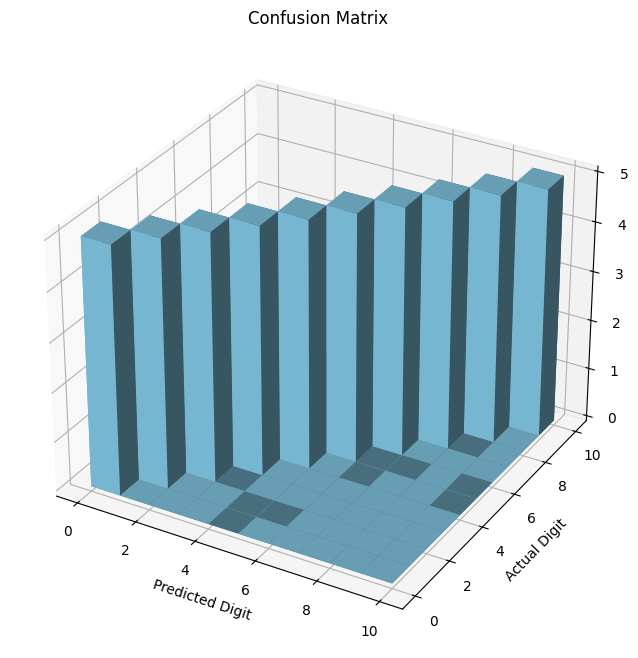

In [266]:
unique_digits = sorted(set(confusion_matrix.keys()))
confusion_matrix_data = np.zeros((len(unique_digits), len(unique_digits)))
for i, actual_digit in enumerate(unique_digits):
    for j, predicted_digit in enumerate(unique_digits):
        confusion_matrix_data[i, j] = confusion_matrix[actual_digit][predicted_digit]
print(confusion_matrix_data)
x = np.arange(10)
y = np.arange(10)
X, Y = np.meshgrid(x, y)
Z = confusion_matrix_data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(Z).ravel(), 1, 1, Z.ravel(), color='skyblue')
ax.set_xlabel('Predicted Digit')
ax.set_ylabel('Actual Digit')
ax.set_zlabel('Count')
ax.set_title('Confusion Matrix')
plt.show()

<b> Report your observations </b>

1. 5 recordings of 2 seconds each per digit were recorded and created a datset.So,totally dataset contains 50 recordings and extracted mfcc features from it.

2. In pair wise cases, Same digits distance has less optimal distance compared to different digits distances.

3. The system classifies the digits well results in 100% accuracy.The DTW worked well with dataset created and provided to it.




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

-----Let's consider 10 recordings for each digit per person because of huge dataset.-----
Persons in the dataset : dict_keys(['yweweler', 'theo', 'nicolas', 'jackson'])
Digits present in the dataset for a person :  dict_keys(['digit0', 'digit1', 'digit2', 'digit3', 'digit4', 'digit5', 'digit6', 'digit7', 'digit8', 'digit9'])
Recordings present in digit is :  10
yweweler's evaluation is completed
theo's evaluation is completed
nicolas's evaluation is completed
jackson's evaluation is completed
Accuracy: 90.25
Confusion Matrix:
yweweler defaultdict(<class 'int'>, {'yweweler': 90, 'nicolas': 10})
theo defaultdict(<class 'int'>, {'theo': 100})
nicolas defaultdict(<class 'int'>, {'nicolas': 91, 'yweweler': 9})
jackson defaultdict(<class 'int'>, {'jackson': 80, 'theo': 8, 'nicolas': 6, 'yweweler': 6})
Confusion Matrix:
Actual \ Predicted		yweweler	theo	nicolas	jackson	
yweweler		90	0	10	0	
theo		0	100	0	0	
nicolas		9	0	91	0	
jackson		6	8	6	80	


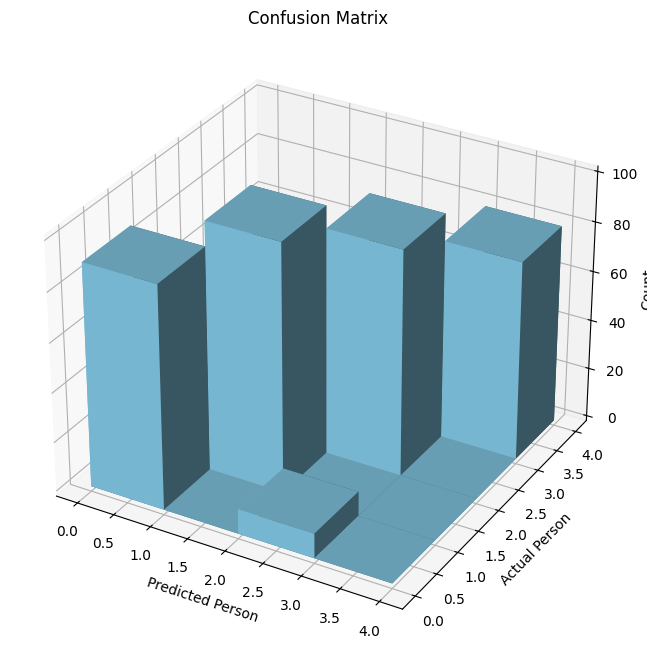

In [267]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def load_data(folder_path):
    speakers = ['yweweler', 'theo', 'nicolas', 'jackson']
    tdigits_dataset = {}
    for speaker in speakers:
        speaker_digit_recordings = {}
        # print("Person:", speaker)
        for digit in range(10):
            digit_recordings = []
            digit_count = 0
            for i in range(10):
                filepath = f"{folder_path}/{speaker}/{digit}_{speaker}_{i}.wav"
                with open(filepath, "rb") as file:
                    recording = mfcc_features(file)
                    digit_recordings.append(recording)
                    digit_count += 1  
            speaker_digit_recordings[f"digit{digit}"] = digit_recordings
            # print(f"{digit} - {digit_count} recordings")
        tdigits_dataset[speaker] = speaker_digit_recordings
    return tdigits_dataset
folder_path = r"C:\Users\sai kiran kocherla\Downloads\MultiSpeakerDigitData_modified\MultiSpeakerDigitData_modified"
tdigits_dataset = load_data(folder_path)




#Performance evaluation of Isolated digit recognition system on TDIGITS data
#Speaker recognition evaluation
print("-----Let's consider 10 recordings for each digit per person because of huge dataset.-----")
print("Persons in the dataset :",tdigits_dataset.keys())
print("Digits present in the dataset for a person : ",tdigits_dataset["theo"].keys())
print("Recordings present in digit is : ",len(tdigits_dataset["theo"]["digit0"]))
correct_predictions = 0
total_predictions = 0
confusion_matrix = collections.defaultdict(lambda: collections.defaultdict(int))
persons=list(tdigits_dataset.keys())
for person, person_digit_recordings in tdigits_dataset.items():
    for digit_signal in person_digit_recordings.keys():
        min_distance = float('inf')
        recognized_digit = None
        for i in range(len(person_digit_recordings[digit_signal])):
            test_signal = np.array(person_digit_recordings[digit_signal][i])
            for other_person, other_person_recordings in tdigits_dataset.items():
                for ref_digitsignal in other_person_recordings.keys():
                    for j in range(len(other_person_recordings[ref_digitsignal])):
                        ref_signal=np.array(other_person_recordings[ref_digitsignal][j])
                        if np.array_equal(ref_signal, test_signal):
                            continue 
                        else:
                            # print(ref_signal.shape,test_signal.shape)
                            distance, _, _, _ = vectorDTW(ref_signal, test_signal)
                            if distance < min_distance:
                                min_distance = distance
                                recognized_digit = other_person
            confusion_matrix[person][recognized_digit] += 1
            if person == recognized_digit:
                correct_predictions += 1
            total_predictions += 1
    print(person+"'s evaluation is completed")
accuracy = (correct_predictions / total_predictions) * 100
print("Accuracy:", accuracy)
print("Confusion Matrix:")
for digit, row in confusion_matrix.items():
    print(digit, row)
confusion_matrix_data = np.zeros((4, 4))
person_order = ['yweweler', 'theo', 'nicolas', 'jackson']
for i, actual_person in enumerate(person_order):
    row = confusion_matrix[actual_person]
    for j, recognized_person in enumerate(person_order):
        confusion_matrix_data[i][j] = row[recognized_person]
print("Confusion Matrix:")
print("Actual \\ Predicted", end="\t\t")
for person in person_order:
    print(person, end="\t")
print()  
for actual_person in person_order:
    print(actual_person, end="\t\t")
    row = confusion_matrix[actual_person]
    for recognized_person in person_order:
        print(row[recognized_person], end="\t")
    print() 
x = np.arange(4)
y = np.arange(4)
X, Y = np.meshgrid(x, y)
Z = confusion_matrix_data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(Z).ravel(), 1, 1, Z.ravel(), color='skyblue')
ax.set_xlabel('Predicted Person')
ax.set_ylabel('Actual Person')
ax.set_zlabel('Count')
ax.set_title('Confusion Matrix')
plt.show()

In [268]:
print("Confusion Matrix:")
print(confusion_matrix_data)
print("Actual \\ Predicted", end="\t")
for person in person_order:
    print(person, end="\t\t\t")
print()  
for actual_person in person_order:
    print(actual_person, end="\t\t\t")
    row = confusion_matrix[actual_person]
    for recognized_person in person_order:
        print(row.get(recognized_person, 0), end="\t\t\t")
    print() 

Confusion Matrix:
[[ 90.   0.  10.   0.]
 [  0. 100.   0.   0.]
 [  9.   0.  91.   0.]
 [  6.   8.   6.  80.]]
Actual \ Predicted	yweweler			theo			nicolas			jackson			
yweweler			90			0			10			0			
theo			0			100			0			0			
nicolas			9			0			91			0			
jackson			6			8			6			80			


-----Let's consider 10 recordings for each digit per person because of huge dataset.-----
Persons in the dataset : dict_keys(['yweweler', 'theo', 'nicolas', 'jackson'])
Digits present in the dataset for a person :  dict_keys(['digit0', 'digit1', 'digit2', 'digit3', 'digit4', 'digit5', 'digit6', 'digit7', 'digit8', 'digit9'])
Recordings present in digit is :  10
Accuracy: 11.5
----------------------------------------------------------------------------------------------------
Confusion Matrix:
Actual \ Predicted	0	1	2	3	4	5	6	7	8	9	
0			0	6	11	9	2	1	0	7	4	0	
1			0	3	11	8	1	0	2	6	4	5	
2			0	0	6	7	5	3	4	8	2	5	
3			0	0	6	5	8	7	4	4	2	4	
4			0	0	5	5	7	8	5	5	2	3	
5			0	1	4	4	7	6	6	6	3	3	
6			0	1	4	4	7	6	5	7	3	3	
7			0	1	4	5	6	6	5	7	3	3	
8			0	1	4	6	4	6	5	7	2	5	
9			0	1	4	6	5	5	5	7	2	5	


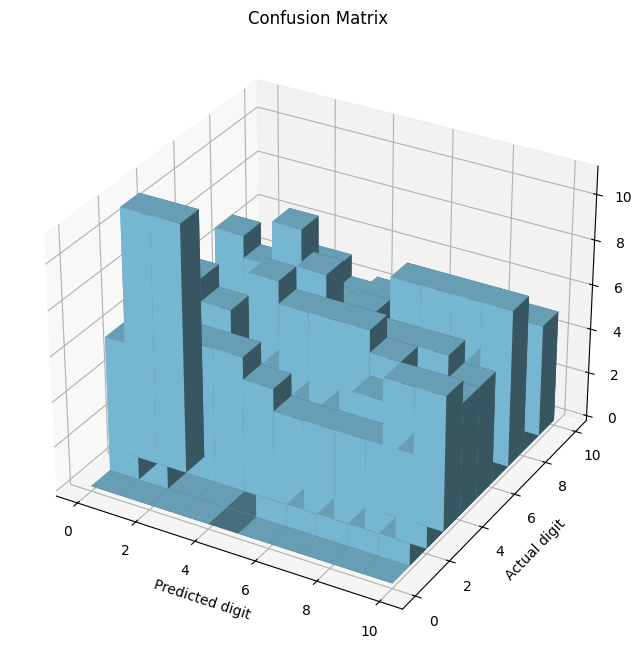

In [319]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data
#Digit recognition evaluation
print("-----Let's consider 10 recordings for each digit per person because of huge dataset.-----")
print("Persons in the dataset :",tdigits_dataset.keys())
print("Digits present in the dataset for a person : ",tdigits_dataset["theo"].keys())
print("Recordings present in digit is : ",len(tdigits_dataset["theo"]["digit0"]))
correct_predictions = 0
total_predictions = 0
confusion_matrix = collections.defaultdict(lambda: collections.defaultdict(int))
for person, person_digit_recordings in tdigits_dataset.items():
    for digit_signal in person_digit_recordings.keys():
       min_distance = float('inf')
       recognized_digit = None
       for i in range(len(person_digit_recordings[digit_signal])):
            test_signal = np.array(person_digit_recordings[digit_signal][i])
            for other_person, other_person_recordings in tdigits_dataset.items():
                for ref_digitsignal in other_person_recordings.keys():
                    for j in range(len(other_person_recordings[ref_digitsignal])):
                        ref_recording = np.array(other_person_recordings[ref_digitsignal][j])
                        # print(ref_recording.shape, test_signal.shape)
                        if np.array_equal(ref_recording, test_signal):
                            continue 
                        else:
                            distance, _, _, _ = vectorDTW(ref_recording, test_signal)
                            if distance < min_distance:
                                min_distance = distance
                                recognized_digit = j
            confusion_matrix[i][recognized_digit] += 1
            if i == recognized_digit:
                correct_predictions += 1
            total_predictions += 1
accuracy = (correct_predictions / total_predictions) * 100
print("Accuracy:", accuracy)
alldigits=[]
for digit, row in confusion_matrix.items():
    alldigits.append(digit)
print("-" * 100)
print("Confusion Matrix:")
print("Actual \\ Predicted", end="\t")
for digit in alldigits:
    print(digit, end="\t")
print()  
for actual_digit, row in confusion_matrix.items():
    print(actual_digit, end="\t\t\t")
    for predicted_digit in alldigits:
        print(row[predicted_digit], end="\t")
    print() 
unique_digits = sorted(set(confusion_matrix.keys()))
confusion_matrix_data = np.zeros((len(unique_digits), len(unique_digits)))
for i, actual_digit in enumerate(unique_digits):
    for j, predicted_digit in enumerate(unique_digits):
        confusion_matrix_data[i, j] = confusion_matrix[actual_digit][predicted_digit]
x = np.arange(10) 
y = np.arange(10)
X, Y = np.meshgrid(x, y)
Z = confusion_matrix_data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        ax.bar3d(x[i], y[j], 0, 1, 1, Z[i, j], color='skyblue')
ax.set_xlabel('Predicted digit')
ax.set_ylabel('Actual digit')
ax.set_zlabel('Count')
ax.set_title('Confusion Matrix')
plt.show()

-----Let's consider 10 recordings for each digit per person because of huge dataset.-----
Accuracy: 100.0
----------------------------------------------------------------------------------------------------
Confusion Matrix:
Actual \ Predicted	digit0	digit1	digit2	digit3	digit4	digit5	digit6	digit7	digit8	digit9	
digit0			10	0	0	0	0	0	0	0	0	0	
digit1			0	10	0	0	0	0	0	0	0	0	
digit2			0	0	10	0	0	0	0	0	0	0	
digit3			0	0	0	10	0	0	0	0	0	0	
digit4			0	0	0	0	10	0	0	0	0	0	
digit5			0	0	0	0	0	10	0	0	0	0	
digit6			0	0	0	0	0	0	10	0	0	0	
digit7			0	0	0	0	0	0	0	10	0	0	
digit8			0	0	0	0	0	0	0	0	10	0	
digit9			0	0	0	0	0	0	0	0	0	10	


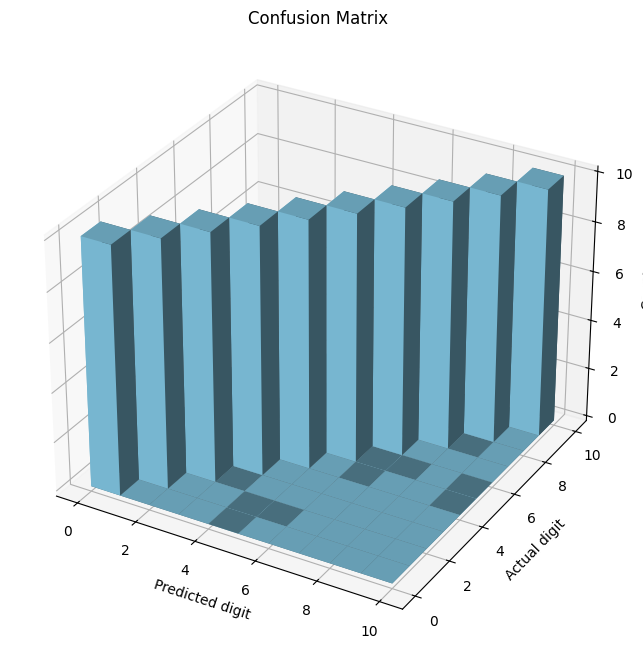

In [282]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker
#Digits recognition evaluation
print("-----Let's consider 10 recordings for each digit per person because of huge dataset.-----")
correct_predictions = 0
total_predictions = 0
confusion_matrix0 = collections.defaultdict(lambda: collections.defaultdict(int))
person = "theo"
for digit_signal, recordings in tdigits_dataset[person].items():
    for test_signals in recordings:
        min_distance = float('inf')
        recognized_digit = None
        test_signal = np.array(test_signals)
        for other_digit, other_recordings in tdigits_dataset[person].items():
            for ref_signal in other_recordings:
                if np.array_equal(ref_signal, test_signal):
                    continue
                else:
                    distance, _, _, _ = vectorDTW(ref_signal, test_signal)
                    if distance < min_distance:
                        min_distance = distance
                        recognized_digit = other_digit
        confusion_matrix0[digit_signal][recognized_digit] += 1
        if digit_signal == recognized_digit:
            correct_predictions += 1
        total_predictions += 1
accuracy = (correct_predictions / total_predictions) * 100
print("Accuracy:", accuracy)
alldigits=[]
for digit, row in confusion_matrix0.items():
    alldigits.append(digit)
print("-" * 100)
print("Confusion Matrix:")
print("Actual \\ Predicted", end="\t")
for digit in alldigits:
    print(digit, end="\t")
print()  
for actual_digit, row in confusion_matrix0.items():
    print(actual_digit, end="\t\t\t")
    for predicted_digit in alldigits:
        print(row[predicted_digit], end="\t")
    print() 
unique_digits = sorted(set(confusion_matrix0.keys()))
confusion_matrix_data = np.zeros((len(unique_digits), len(unique_digits)))
for i, actual_digit in enumerate(unique_digits):
    for j, predicted_digit in enumerate(unique_digits):
        confusion_matrix_data[i, j] = confusion_matrix0[actual_digit][predicted_digit]
x = np.arange(10) 
y = np.arange(10)
X, Y = np.meshgrid(x, y)
Z = confusion_matrix_data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        ax.bar3d(x[i], y[j], 0, 1, 1, Z[i, j], color='skyblue')
ax.set_xlabel('Predicted digit')
ax.set_ylabel('Actual digit')
ax.set_zlabel('Count')
ax.set_title('Confusion Matrix')
plt.show()

-----Let's consider 10 recordings for each digit per person because of huge dataset.-----
Accuracy: 42.0
----------------------------------------------------------------------------------------------------
Confusion Matrix:
Actual \ Predicted	digit0	digit1	digit2	digit3	digit4	digit5	digit6	digit7	digit8	digit9	
digit0			0	0	0	0	7	0	3	0	0	0	
digit1			0	6	0	0	0	0	1	3	0	0	
digit2			0	0	0	0	1	0	8	0	1	0	
digit3			0	0	0	0	0	0	10	0	0	0	
digit4			0	0	0	0	7	0	3	0	0	0	
digit5			0	1	0	0	0	8	0	0	0	1	
digit6			0	0	0	0	0	0	9	0	1	0	
digit7			0	0	0	0	2	0	5	3	0	0	
digit8			0	0	0	0	0	0	9	0	1	0	
digit9			0	0	0	0	1	0	1	0	0	8	


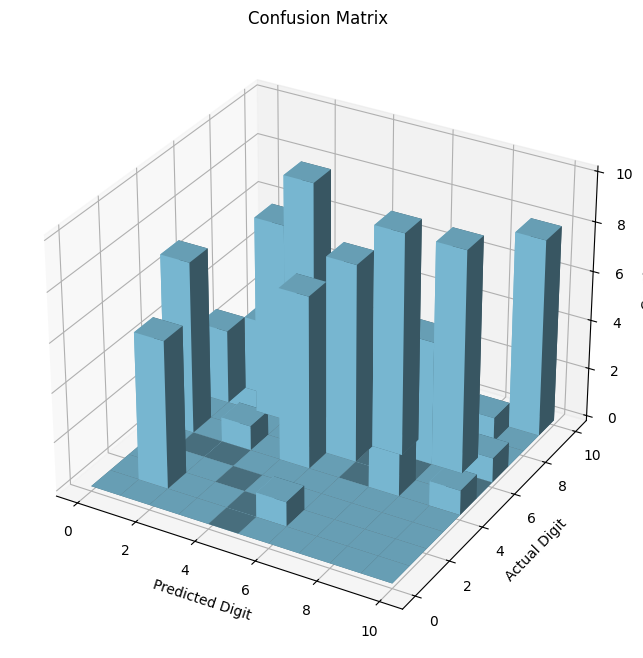

In [283]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
#Digits recognition evaluation 
print("-----Let's consider 10 recordings for each digit per person because of huge dataset.-----")
correct_predictions = 0
total_predictions = 0
confusion_matrix0 = collections.defaultdict(lambda: collections.defaultdict(int))
person1 = 'nicolas'
person2 = 'yweweler'
for digit_signal, recordings in tdigits_dataset[person1].items():
    for test_signals in recordings:
        min_distance = float('inf')
        recognized_digit = None
        test_signal = np.array(test_signals)
        for other_digit, other_recordings in tdigits_dataset[person2].items():
            for ref_signal in other_recordings:
                if np.array_equal(ref_signal, test_signal):
                    continue 
                else:
                    distance, _, _, _ = vectorDTW(ref_signal, test_signal)
                    if distance < min_distance:
                        min_distance = distance
                        recognized_digit = other_digit
        confusion_matrix0[digit_signal][recognized_digit] += 1
        if digit_signal == recognized_digit:
            correct_predictions += 1
        total_predictions += 1
accuracy = (correct_predictions / total_predictions) * 100
print("Accuracy:", accuracy)
alldigits=[]
for digit, row in confusion_matrix0.items():
    alldigits.append(digit)
print("-" * 100)
print("Confusion Matrix:")
print("Actual \\ Predicted", end="\t")
for digit in alldigits:
    print(digit, end="\t")
print() 
for actual_digit, row in confusion_matrix0.items():
    print(actual_digit, end="\t\t\t")
    for predicted_digit in alldigits:
        print(row[predicted_digit], end="\t")
    print() 
unique_digits = sorted(set(confusion_matrix0.keys()))
confusion_matrix_data = np.zeros((len(unique_digits), len(unique_digits)))
for i, actual_digit in enumerate(unique_digits):
    for j, predicted_digit in enumerate(unique_digits):
        confusion_matrix_data[i, j] = confusion_matrix0[actual_digit][predicted_digit]
x = np.arange(10) 
y = np.arange(10)
X, Y = np.meshgrid(x, y)
Z = confusion_matrix_data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        ax.bar3d(x[i], y[j], 0, 1, 1, Z[i, j], color='skyblue')
ax.set_xlabel('Predicted Digit')
ax.set_ylabel('Actual Digit')
ax.set_zlabel('Count')
ax.set_title('Confusion Matrix')
plt.show()

Accuracy: 0.0
Confusion Matrix:
nicolas defaultdict(<class 'int'>, {'yweweler': 100})
Confusion Matrix:
[[  0. 100.]
 [  0.   0.]]
Actual \ Predicted	nicolas		yweweler		
nicolas			0		100		
yweweler			0		0		


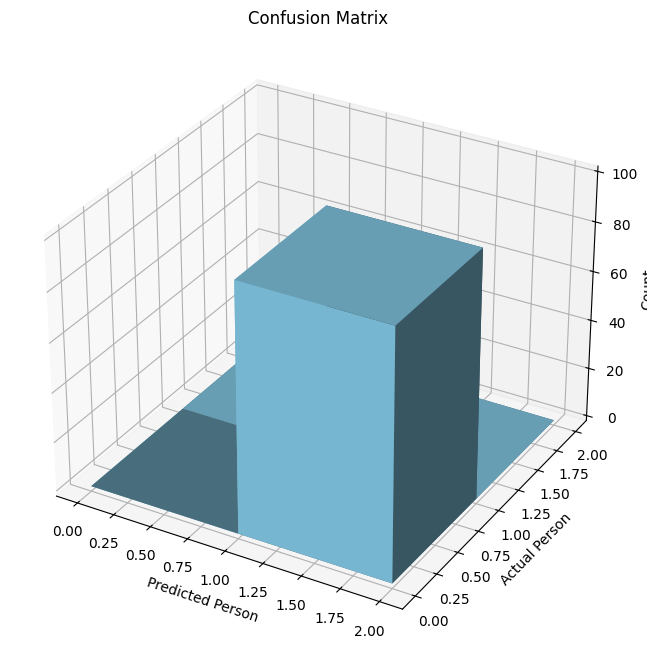

In [285]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
#Speaker recoginition evaluation
correct_predictions = 0
total_predictions = 0
confusion_matrix3 = collections.defaultdict(lambda: collections.defaultdict(int))
person1 = 'nicolas'
person2 = 'yweweler'
for digit_signal in tdigits_dataset[person1]:
    for digit_recording in tdigits_dataset[person1][digit_signal]:
        min_distance = float('inf')
        recognized_person = None
        test_signal = np.array(digit_recording)
        for ref_signal in tdigits_dataset[person2]:
            for ref_recording in tdigits_dataset[person2][ref_signal]:
                if np.array_equal(ref_recording, test_signal):
                    continue  
                else:
                    distance, _, _, _ = vectorDTW(ref_recording, test_signal)
                    if distance < min_distance:
                        min_distance = distance
                        recognized_person = person2
        confusion_matrix3[person1][recognized_person] += 1
        if person1 == recognized_person:
            correct_predictions += 1
        total_predictions += 1
accuracy = (correct_predictions / total_predictions) * 100
print("Accuracy:", accuracy)
print("Confusion Matrix:")
for person, row in confusion_matrix3.items():
    print(person, row)
confusion_matrix_data3 = np.zeros((2, 2))
person_order = ['nicolas', 'yweweler']
for i, actual_person in enumerate(person_order):
    row = confusion_matrix3[actual_person]
    for j, recognized_person in enumerate(person_order):
        confusion_matrix_data3[i][j] = row[recognized_person]
print("Confusion Matrix:")
print(confusion_matrix_data3)
print("Actual \\ Predicted", end="\t")
for person in person_order:
    print(person, end="\t\t")
print() 
for actual_person in person_order:
    print(actual_person, end="\t\t\t")
    row = confusion_matrix3[actual_person]
    for recognized_person in person_order:
        print(row[recognized_person], end="\t\t")
    print() 
x = np.arange(2)
y = np.arange(2)
X, Y = np.meshgrid(x, y)
Z = confusion_matrix_data3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(Z).ravel(), 1, 1, Z.ravel(), color='skyblue')
ax.set_xlabel('Predicted Person')
ax.set_ylabel('Actual Person')
ax.set_zlabel('Count')
ax.set_title('Confusion Matrix')
plt.show()

<b>Suggest some of the changes to improve the system performance.</b>
1. Windowing while execution can increase the accuracy of the system.
2. Using different distance rather than euclidean may increase the system.
3. Normalization of the data before execution may increase the capability of the system.


<b> Report your observations </b>

1. System can't able to recognise the speakers correctly results in decrease of accuracy to 90.25% and also digit recognition of complete dataset is also fails.

2. Digit recognition worked well in same speaker case results in accuracy of 100%

3. Digit recognition hasn't worked well in different speakers condition results in decrease of accuracy to 42%.

4. Speaker recognition system worked well as the test signal and reference signal are different speakers the accuracy need to be 0% and 0% came.

